In [124]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [125]:
path2classic = "/home/lambda/code/synth_spectrum/data/Test_spectrum.syn"
path2low = "/home/lambda/code/synth_spectrum/data/Test_spectrum_bad.syn"

In [126]:
def extract_data(path):
    data = np.genfromtxt(path)
    ang = data[:, 0]
    red_flux = data[:, 1]
    cont = data[:, 3]
    ang.astype(float)
    return ang, red_flux, cont

In [127]:
ang, flux, _ = extract_data(path2classic)
ang_low, flux_low, _ = extract_data(path2low)

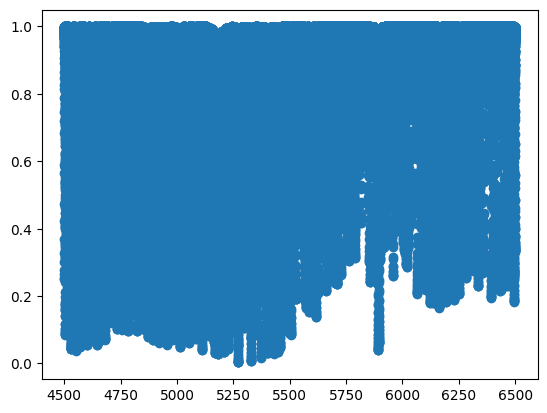

In [128]:
plt.scatter(ang, flux)

In [129]:
# So much data, need to small window
# from 6000 angs to 6100
start = 6000
end = 6050
index_start = np.where(ang==start)[0][0]
index_end = np.where(ang==end)[0][0]
index_start_low = np.where(ang_low==start)[0][0]
index_end_low = np.where(ang_low==end)[0][0]

In [130]:
print(index_start_low)
print(index_start)

1500
150000


In [131]:
ang = ang[index_start:index_end]
ang_low = ang_low[index_start_low:index_end_low]
flux = flux[index_start:index_end]
flux_low = flux_low[index_start_low:index_end_low]

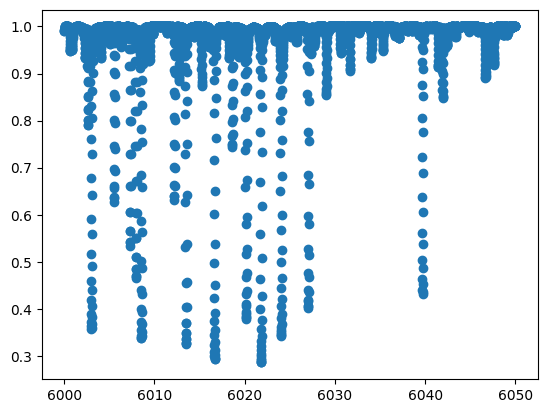

In [132]:
plt.scatter(ang, flux)

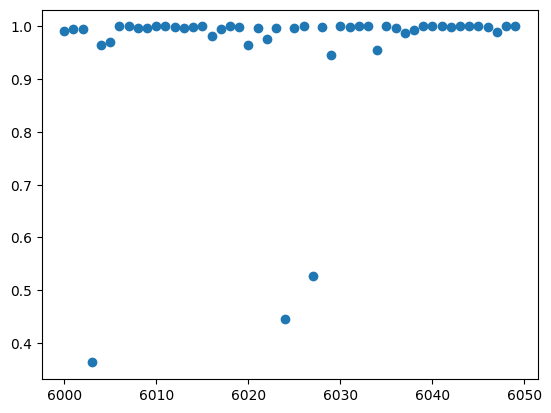

In [133]:
plt.scatter(ang_low, flux_low)